# Say Cheese..

<div style="text-align: right"> March 7, 2022 </div>

<div style="text-align: right"> Jessla Varaparambil Abdul Kadher </div>

## Introduction

[Cheese](https://en.wikipedia.org/wiki/Cheese) is a dairy product produced in wide ranges of flavors, textures and forms by coagulation of the milk protein casein. It comprises proteins and fat from milk, usually the milk of cows, buffalo, goats, or sheep. During production, the milk is usually acidified and the enzymes of either rennet or bacterial enzymes with similar activity are added to cause the casein to coagulate. The solid curds are then separated from the liquid whey and pressed into finished cheese. Some cheeses have aromatic molds on the rind, the outer layer, or throughout.

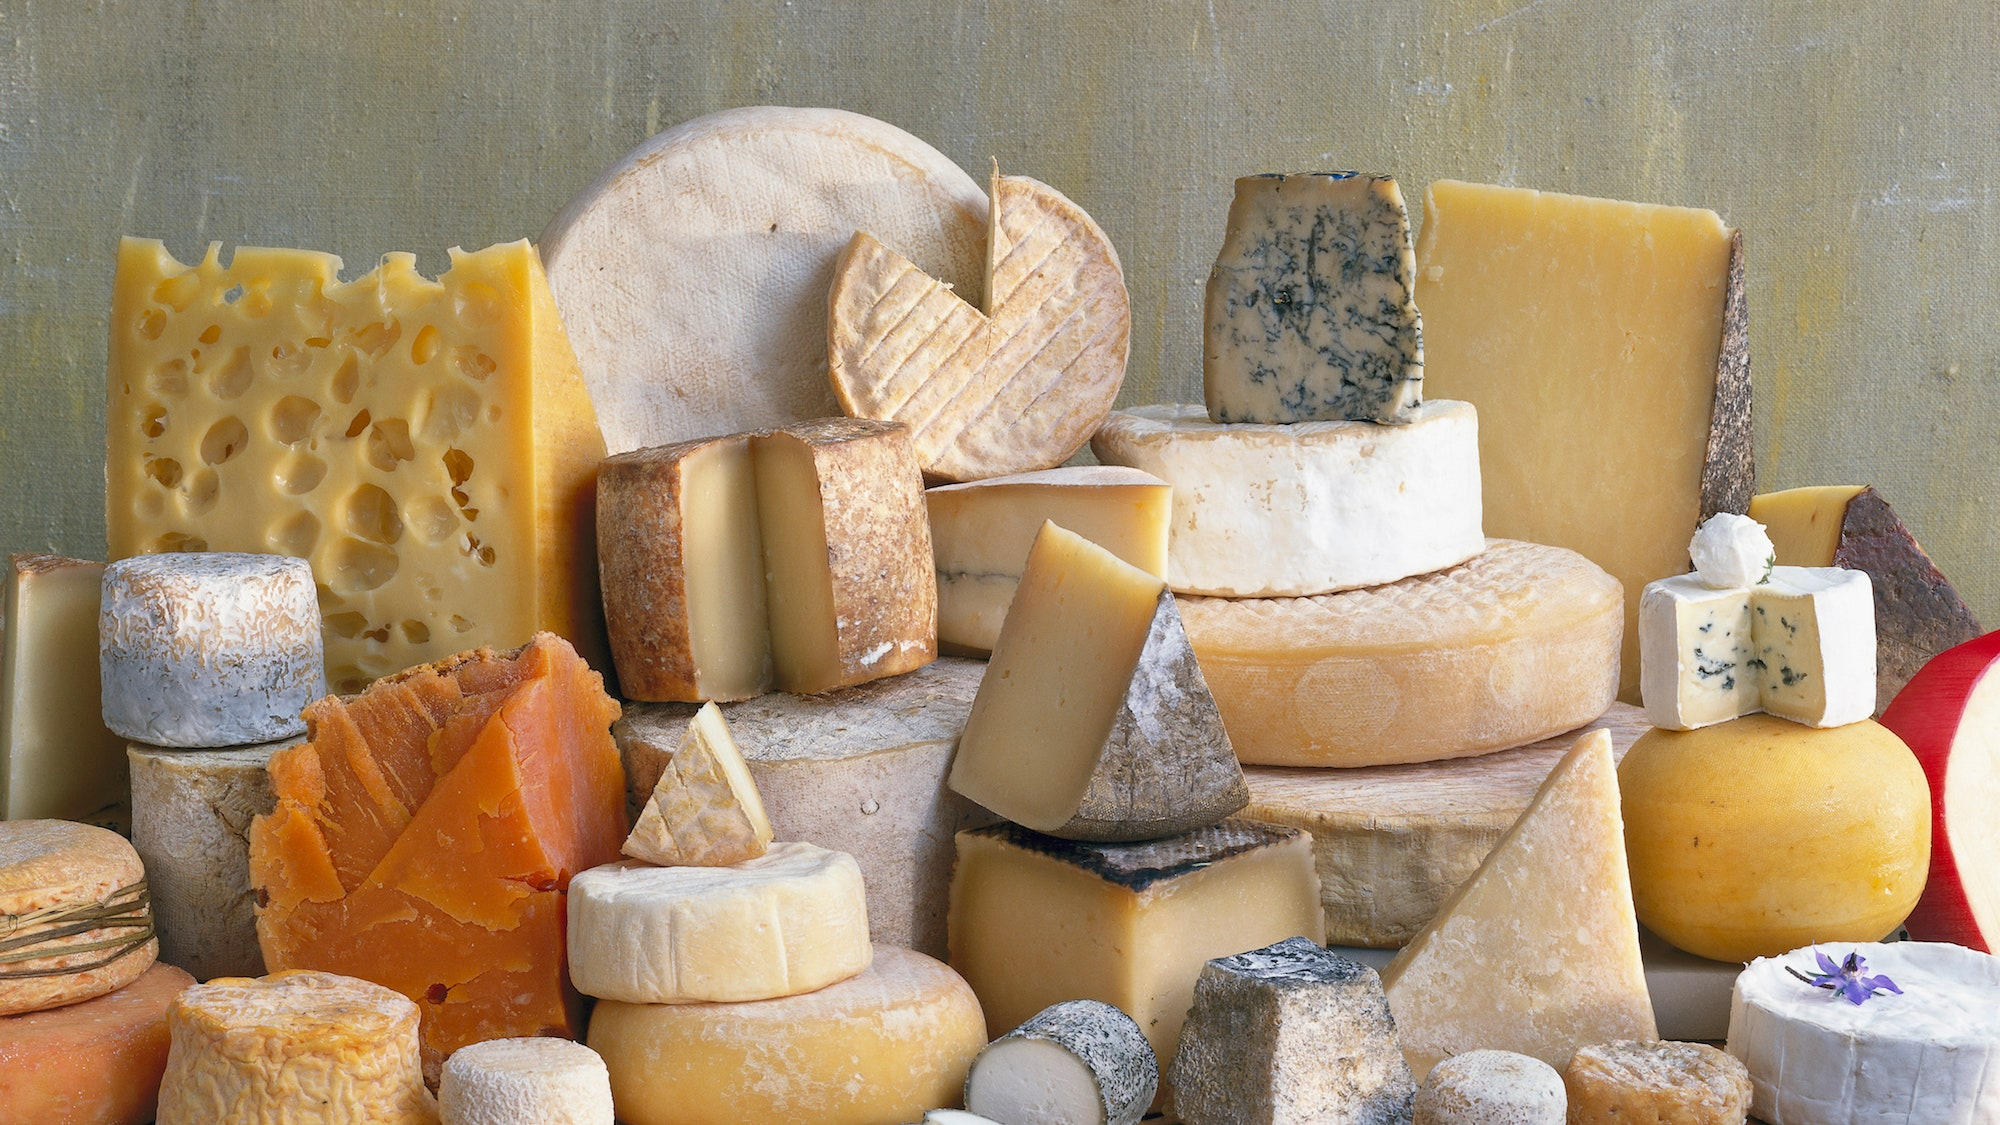

### Motivation

Over a thousand types of cheese exist and are currently produced in various countries. So when selecting a cheese, one will have many factors to consider. For many people the fat level is one of the major factor in choosing any dairy product. People generally prefer low fat to the high fat counterpart.

Why is the general popluation concerned about the fat content in cheese? 
* Health issues (This population generally prefers Low fat products)
* taste (When taste is the motivating factor, this population goes for High fat variations)

Since, we have established fat level is one of the selection criteria for cheese selection, Lets look at the given dataset and see which features may contribute to classifying the fat level in cheeses. And we will be considering low fat as our positive label. 

Lets import the desired libraries and the data for our analysis

In [438]:
import pandas as pd
import altair as alt
import numpy as  np

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.dummy import DummyClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import plot_confusion_matrix, classification_report

from scipy.stats import lognorm, loguniform, randint

## Exploratory Data Analysis

Lets explore the cheese dataset to find possible relationship between various features and the fat level

In [439]:
cheese_df = pd.read_csv('cheese_data.csv')
cheese_df.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


Before we do anything step 1 is to split the data into train and test datasets.

In [440]:
train_df, test_df = train_test_split(cheese_df, test_size = 0.2, random_state = 928)

We will do EDA on the train dataset, Let's apply .info() to get a concise summary of the train data

In [441]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 690 to 85
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              833 non-null    int64  
 1   ManufacturerProvCode  833 non-null    object 
 2   ManufacturingTypeEn   833 non-null    object 
 3   MoisturePercent       822 non-null    float64
 4   FlavourEn             643 non-null    object 
 5   CharacteristicsEn     517 non-null    object 
 6   Organic               833 non-null    int64  
 7   CategoryTypeEn        814 non-null    object 
 8   MilkTypeEn            832 non-null    object 
 9   MilkTreatmentTypeEn   776 non-null    object 
 10  RindTypeEn            586 non-null    object 
 11  CheeseName            833 non-null    object 
 12  FatLevel              833 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 91.1+ KB


Looking at the summary from above it can be seen that, there are a lot of missing values. so, transformation of the columns would be needed to fit the model. Which transformers are needed depends on the type of feature we will be categorizing them into. Also, we need to decide which of the features might contribute to the target value in our dataset. The dataset has 3 numerical columns and 10 categorical columns. Lets understand the features better by doing a summary statistics.

In [442]:
train_df.describe(include ='all')

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
count,833.000000,833,833,822.000000,643,517,833.000000,814,832,776,586,833,833
unique,NaN,10,3,NaN,513,443,NaN,6,8,3,4,831,2
top,NaN,QC,Industrial,NaN,Mild,Creamy,NaN,Firm Cheese,Cow,Pasteurized,No Rind,Cheddar,lower fat
freq,NaN,645,372,NaN,48,15,NaN,285,595,637,331,2,545
mean,1572.981993,NaN,NaN,46.854501,NaN,NaN,0.096038,NaN,NaN,NaN,NaN,NaN,NaN
std,445.426209,NaN,NaN,9.251291,NaN,NaN,0.294821,NaN,NaN,NaN,NaN,NaN,NaN
min,228.000000,NaN,NaN,17.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1297.000000,NaN,NaN,40.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1553.000000,NaN,NaN,45.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1918.000000,NaN,NaN,52.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Lets look at the uniqueness of the features a criteria to separate them into numerical, categorical, binary, ordinal features, this will also give us an indication of which of the features to keep, drop and pass through while making the pipeline.  The summary statistics does not show the unique values of the CheeseId and Organic since it is considered as numerical value, so it is obtained as follows.

In [443]:
train_df[['CheeseId']].nunique()

CheeseId    833
dtype: int64

In [444]:
train_df[['Organic']].nunique()

Organic    2
dtype: int64

Looking at the columns CheeseId seems to be a numeric value given for documentation purpose and if we give this to the model, model won't be learning anything useful from it (or will be learning something wrong) for our classification model, so we'll keep it as drop feature for the pipeline.<br>
The 2 numeric features left are Moisture percentage and Organic and in that Organic column seems to have only 0 and 1 values, so we will treat moisture percentage as numerical feature and Organic as Passthrough for the pipeline, since we don't need any transformation on this, but we still want it as a feature.<br>
Looking at the rest of the features, ManufacturerProvCode, ManufacturingTypeEn, CategoryTypeEn, MilkTypeEn, MilkTreatmentTypeEn, RindTypeEn have less than 10 unique values. But due to my lack of knowledge in cheese I would not  be able to rank them to make it ordinal features, hence I would be categorizing them as categorical features. Here ManufacturerProvCode is not taken as a drop feature because I think the weather in which the animal grows up may have an impact on the quality of the milk, hence may contribute to the model<br>
FlavourEn, CharacteristicsEn have more than 400+ unique values. FlavourEn with a highest frequency of 48 and CharacteristicEn with freq. of 15, and also looking at the column for values, it can be seen that there are some overlap of words which are not given by the summary statistics in freq., so considering these factors, I am going to categorize them as text data.<br>
The only column left is, CheeseName, Even though the number of unique values is almost same as the number of samples, taking a closer look there are some cheese groups with small variations. So, this feature might help with the learning for the fat level classification. Hence this is also considered as text data.<br>

We can separate these columns for numeric, categorical, passthrough and drop features for the pipeline, as shown

In [445]:
numeric_feature = ['MoisturePercent']
categorical_features = ['ManufacturerProvCode', 'ManufacturingTypeEn',
                        'CategoryTypeEn','MilkTypeEn', 'MilkTreatmentTypeEn' ]
passthrough_feature = ['Organic']
drop_feature = ['CheeseId']

Lets take a look at our target column to find out if there are any imbalances

In [446]:
train_df[['FatLevel']].value_counts()

FatLevel  
lower fat     545
higher fat    288
dtype: int64

From above it can be seen that there is a class imbalance of just over 1:2 <br>
Here we will be using class_weight = 'balanced' to the models that allow us to do so. 

### Visualizations

Lets visualize the data to explore the feature target relations

In [447]:
scatter_plot_mantype =  alt.Chart(train_df).mark_circle(stroke = 'black',size =100).encode(
alt.X('MoisturePercent', title = 'Moisture Percentage'),
alt.Y('ManufacturingTypeEn', title = None),
alt.Color('FatLevel', scale = alt.Scale(scheme = 'turbo'))).properties(height = 100, width = 800) 
scatter_plot_mantype

alt.Chart(...)

The above plot shows for all manufacturing types the low fat cheeses have high percentage of moisture except for very few outliers. This implies that the moisture percentage will be a very good feature for our ML model. The plot does not give much information about the relationship between the Manufacturing type and FatLevel, except the indirect relation we can infer from the moisture percent to each cheese manufacturing type. A good way to explore the categorical variables would be to visualize a faceted repeated boxplot to infer the relations better.<br>

The box plot gives us the relationship between count of each categorical variable in relation to the moisture percent. Taking the example of ManufacturyingTypeEn for industrial manufactured cheeses, for cheeses classified under higher fat, the Q3 value is 45 and max is 68, and similarly for lower fat cheeses the Q3 is 55 and max is 86. similarly we could infer similar observation for all other categories.<br>

In [448]:
box_eda = alt.Chart(train_df).mark_boxplot().encode(
alt.X('MoisturePercent', type = 'quantitative'),
alt.Y(alt.repeat('row'), type = 'nominal')
).facet(column = 'FatLevel').repeat(row = categorical_features)
box_eda

alt.RepeatChart(...)

## Modeling and Training

### Baseline Model

Now lets begin our modeling by building a baseline model<br>
For that we need to split the X_train dataframe into X_tr and y_tr. Since this is a baseline model, we do not need to worry about the Null values as it does not affect the baseline model.

In [449]:
X_tr, y_tr = train_df.drop(columns = 'FatLevel'), train_df['FatLevel']

We are going to build a dummy classifier model for our baseline with the 'most_frequent' strategy. 

In [450]:
dummy = DummyClassifier(strategy = 'most_frequent')

Since, accuracy might not always give us the best scoring measure for the model especially when the data is imbalanced, We will be finding out the precision, recall, f1 score along with the accuracy. <br>
But the output label is not encoded so, we have to encode it to calculate these values. For that we will be using LabelEncoder for preprocessing the output labels. And we will define the scorer with the scores we have to measure. 

In [451]:
le = preprocessing.LabelEncoder()
le.fit(np.ravel(y_tr))
scorer = ['accuracy','f1','recall','precision']

In [452]:
dummy_scores = pd.DataFrame(cross_validate(dummy, 
                                           X_tr, 
                                           le.transform(y_tr), 
                                           cv =5,
                                           return_train_score = True,
                                           scoring = scorer
                                          ))
dummy_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.001992,0.003989,0.652695,0.654655,0.789855,0.791289,1.0,1.0,0.652695,0.654655
1,0.001994,0.001994,0.652695,0.654655,0.789855,0.791289,1.0,1.0,0.652695,0.654655
2,0.000998,0.001993,0.652695,0.654655,0.789855,0.791289,1.0,1.0,0.652695,0.654655
3,0.000388,0.001994,0.656627,0.653673,0.792727,0.790571,1.0,1.0,0.656627,0.653673
4,0.000998,0.001994,0.656627,0.653673,0.792727,0.790571,1.0,1.0,0.656627,0.653673


### Cross Validation and Comparison of Different Models

As we have mentioned earlier, almost all the categorical columns have null values and would be needing preprocessing<br>
We have decided that FlavourEn, CharacteristicEn and CheeseName will be considered as text data and the null values in them might cause an issue while using the CountVectorizer and hence filling the null values with empty string "" would allow us to do the preprocessing on the text data. Filled training dataframe is splitted to obtain X_train and y_train.

In [453]:
train_df_fill = train_df.assign(FlavourEn = train_df['FlavourEn'].fillna(value = ''),
                                CharacteristicsEn = train_df['CharacteristicsEn'].fillna(value = ''),
                               CheeseName = train_df['CheeseName'].fillna(value = ''))
X_train, y_train = train_df_fill.drop(columns = 'FatLevel'), train_df_fill[['FatLevel']]

Now our data is ready for preprocessing. The pipeline is made to apply the column transformations for the categorical and numerical features. A vector object is defined for the CountVectorizer to process the text data. 

In [454]:
numeric_transformer = make_pipeline(SimpleImputer(strategy = "median"), 
                                    StandardScaler())
categorical_transformer = make_pipeline(
    SimpleImputer(strategy = 'constant', fill_value=''),
    OneHotEncoder(handle_unknown='ignore')) 
vector = CountVectorizer()

The column transformation is done and is stored in an object named preprocessor

In [455]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_feature),
    (categorical_transformer, categorical_features),
    (vector, 'FlavourEn'),
    (vector, 'CharacteristicsEn'),
    (vector, 'CheeseName'),
    ('passthrough', passthrough_feature),
    ('drop',drop_feature))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MoisturePercent']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ManufacturerProvCode', 'ManufacturingTypeEn',
                                  'CategoryTypeEn', 'MilkTypeEn',
                    

Lets study differnt models by cross validating and find out diffrent scores including precision, accuracy, f1 score and recall.

In [456]:
results_dict = {'Dummy':{'mean_train_accuracy': dummy_scores['train_accuracy'].mean(),
                         'mean_validation_accuracy': dummy_scores['test_accuracy'].mean(),
                         'mean_train_f1' : dummy_scores['train_f1'].mean(),
                         'mean_validation_f1' : dummy_scores['test_f1'].mean(),
                         'mean_train_recall' : dummy_scores['train_recall'].mean(),
                         'mean_validation_recall' : dummy_scores['test_recall'].mean(),
                         'mean_train_precision' : dummy_scores['train_precision'].mean(),
                         'mean_validation_precision' : dummy_scores['test_precision'].mean(),
                         'mean_fit_time (s)': dummy_scores['fit_time'].mean(),
                         'mean_score_time (s)': dummy_scores['score_time'].mean()}}
                         
models = {
    'Decision Tree' :DecisionTreeClassifier(random_state = 123, class_weight = 'balanced'),
    'Random Forest' : RandomForestClassifier(random_state = 123, class_weight= 'balanced'),
    'kNN' : KNeighborsClassifier(),
    'RBF SVM': SVC(class_weight = 'balanced'), 
    'Logistic Regression': LogisticRegression(class_weight = 'balanced')
}

for model_name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    scores = cross_validate(pipe, 
                            X_train, 
                            le.transform(np.ravel(y_train)), 
                            cv =5, 
                            return_train_score =True,
                           scoring = scorer)
    
    results_dict[model_name] = {'mean_train_accuracy': scores['train_accuracy'].mean(),
                                'mean_validation_accuracy': scores['test_accuracy'].mean(),
                                'mean_train_f1' : scores['train_f1'].mean(),
                                'mean_validation_f1' : scores['test_f1'].mean(),
                                'mean_train_recall' : scores['train_recall'].mean(),
                                'mean_validation_recall' : scores['test_recall'].mean(),
                                'mean_train_precision' : scores['train_precision'].mean(),
                                'mean_validation_precision' : scores['test_precision'].mean(),
                                'mean_fit_time (s)': scores['fit_time'].mean(),
                                'mean_score_time (s)': scores['score_time'].mean()}

results_df = pd.DataFrame(results_dict).T.reset_index()
results_df

,index,mean_train_accuracy,mean_validation_accuracy,mean_train_f1,mean_validation_f1,mean_train_recall,mean_validation_recall,mean_train_precision,mean_validation_precision,mean_fit_time (s),mean_score_time (s)
0,Dummy,0.654262,0.654267,0.791002,0.791004,1.000000,1.000000,0.654262,0.654267,0.001274,0.002393
1,Decision Tree,1.000000,0.816326,1.000000,0.857370,1.000000,0.844037,1.000000,0.871963,0.058534,0.024077
2,Random Forest,1.000000,0.827112,1.000000,0.876083,1.000000,0.933945,1.000000,0.825083,0.261565,0.023743
3,kNN,0.836435,0.776704,0.877290,0.831352,0.894037,0.842202,0.861280,0.821576,0.030364,0.021987
4,RBF SVM,0.951980,0.800743,0.962652,0.845330,0.945872,0.836697,0.980073,0.855222,0.076162,0.025831
5,Logistic Regression,0.970588,0.797107,0.977321,0.840889,0.969266,0.822018,0.985541,0.861609,0.061151,0.015416


Visualising these scores would give us a better idea than looking at the numerical scores, lets define a function to make line plots to compare different classfieirs with differnt scores

In [457]:
def plot_score_plots(df, x, y, col, tit):
    """
    plots line plot for different scores
    
    Parameters
    -----------------------------------
    df : the dataframe object
    x : x coordinate of the plot
    y : y coordinate of the plot
    col : color of line plot
    tit : title of the plot
    
    Returns:
    ----------------------------------
    an altair concatenated line plot
    
    """
    
    line_plot = alt.Chart(df).mark_line(color = str(col)).encode(
        x = alt.X(str(x),title=None),
        y = alt.Y(str(y), title =None, scale = alt.Scale(domain = (0.6, 1.05))),
        tooltip = [x, y]
    ).properties(title = tit, width=500, height = 250)
    
    line_plot = (line_plot + line_plot.mark_point(color = 'red')).interactive()
    return line_plot

Lets compare Accuracy for training and validation sets. 

In [458]:
train_accuracy_plot = plot_score_plots(results_df, 'index', 'mean_train_accuracy' , 'green', 'Accuracy Plot(Green: Training, Blue: Validation)')       
test_accuracy_plot = plot_score_plots(results_df, 'index', 'mean_validation_accuracy' , 'blue', 'Accuracy for Different Models')
accuracy_plot = train_accuracy_plot + test_accuracy_plot
accuracy_plot

alt.LayerChart(...)

From the above plot it is clear that tree based classifiers (Decision Tree and Random Forest) are overfitting. If we do not consider the baseline model of dummy classifier, the diffrence between train and validation accuracy scores is lowest for kNN and second lowest would be RBF-SVM and third Logistic Regression. Lets plot other scores as well for better comparison to figure out which 2 models to go forward with. 

In [459]:
acc_train = plot_score_plots(results_df, 'index', 'mean_train_accuracy' , 'green', 'Training Score Plot (Accuracy:Green, f1:blue, precision:violet, recall:orange)')
f1_train = plot_score_plots(results_df, 'index', 'mean_train_f1' , 'blue', '(f1 - blue)')
precision_train = plot_score_plots(results_df, 'index', 'mean_train_precision' , 'violet', '(precision - violet)')
recall_train = plot_score_plots(results_df, 'index', 'mean_train_recall' , 'orange', '(recall - orange)')
score_plot_train = acc_train + f1_train + precision_train + recall_train

In [460]:
acc_valid = plot_score_plots(results_df, 'index', 'mean_validation_accuracy' , 'green', 'Validation Score Plot (Accuracy:Green, f1:blue, precision:violet, recall:orange)')
f1_valid = plot_score_plots(results_df, 'index', 'mean_validation_f1' , 'blue', '(f1 - blue)')
precision_valid = plot_score_plots(results_df, 'index', 'mean_validation_precision' , 'violet', '(precision - violet)')
recall_valid = plot_score_plots(results_df, 'index', 'mean_validation_recall' , 'orange', '(recall - orange)')
score_plot_valid = acc_valid + f1_valid + precision_valid + recall_valid
score_plot_train | score_plot_valid

alt.HConcatChart(...)

By looking at the above scoring curves, it is clear that out of the three we are considering, f1, precision and recall scores are better for Logistic Regression and RBF SVM. So, we will be moving forward with one similarity-based model (RBF SVM) and one linear model (Logistic Regression) to do further analyses. 

## HyperParameter Tuning

### Logistic Regression

One of the reason for choosing logistic regression, a linear model, is also because it would give us the feature coefficients, and we can find out how much each feature is contributing to the final model.<br>

Now, pipeline is made for the model and we will do RandomSearchCV to tune the hyperparameters, Since we have a imbalanced dataset, the criteria to choose the best model will be based on the f1 score and we have given f1 score for scoring.<br>

The parameters tuned are 'C' for logistic regression and max_features for the three countvectorizers used for text data. It is given in a parameter grid as shown.

In [461]:
param_grid_log= {
    "logisticregression__C": loguniform(0.01, 100),
    'columntransformer__countvectorizer-3__max_features': randint(10, 1000),
    'columntransformer__countvectorizer-2__max_features': randint(10, 1000),
    'columntransformer__countvectorizer-1__max_features': randint(10, 1000)   
}

In [462]:
log_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=2000, class_weight = 'balanced'))

We will be using RandomizedSearchCV for hyperparameter tuning because, the model will tune to random values for the hyperparametetrs and it will consume less time. 

In [463]:
random_search_log = RandomizedSearchCV(log_pipe,
                                  param_grid_log,
                                  n_iter= 20, 
                                  n_jobs = -1,
                                  cv= 5, 
                                  random_state= 888,  
                                  verbose= 3,
                                  scoring = 'f1',
                                  #refit = False,
                                  return_train_score= True)
random_search_log.fit(X_train, le.transform(np.ravel(y_train)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['MoisturePercent']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                 

We can get the the dataframe for the hyperparameter tuning as shown below

In [464]:
random_search_log_df = pd.DataFrame(random_search_log.cv_results_)
random_search_log_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__countvectorizer-1__max_features,param_columntransformer__countvectorizer-2__max_features,param_columntransformer__countvectorizer-3__max_features,param_logisticregression__C,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.202693,0.010409,0.017103,0.004180,520,932,503,11.471624,{'columntransformer__countvectorizer-1__max_fe...,0.877828,...,0.820409,0.031308,13,0.997706,0.998855,0.996556,0.996556,0.996556,0.997246,0.000920
1,0.118946,0.006470,0.024444,0.006033,125,369,824,0.517876,{'columntransformer__countvectorizer-1__max_fe...,0.871560,...,0.843496,0.019022,4,0.938242,0.954172,0.949590,0.946871,0.952159,0.948207,0.005553
2,0.081617,0.008553,0.029028,0.002726,119,923,410,0.084891,{'columntransformer__countvectorizer-1__max_fe...,0.853081,...,0.816781,0.028381,15,0.875149,0.890756,0.889157,0.886228,0.875453,0.883349,0.006730
3,0.130661,0.010517,0.042233,0.027721,874,643,525,1.360804,{'columntransformer__countvectorizer-1__max_fe...,0.895928,...,0.847127,0.027716,2,0.969697,0.987283,0.976852,0.979215,0.974596,0.977529,0.005803
4,0.130989,0.024226,0.037710,0.011215,548,413,164,0.534661,{'columntransformer__countvectorizer-1__max_fe...,0.880734,...,0.842116,0.024132,5,0.933649,0.941315,0.941038,0.939645,0.938824,0.938894,0.002776
5,0.133263,0.006449,0.031513,0.005937,389,190,651,0.381002,{'columntransformer__countvectorizer-1__max_fe...,0.885845,...,0.844634,0.026749,3,0.931442,0.946009,0.942421,0.944510,0.942556,0.941388,0.005147
6,0.142816,0.009315,0.025163,0.003961,402,128,557,3.418549,{'columntransformer__countvectorizer-1__max_fe...,0.882883,...,0.834653,0.026250,10,0.991926,0.994259,0.991945,0.990783,0.989619,0.991707,0.001538
7,0.120766,0.007652,0.035103,0.012541,575,867,904,1.027085,{'columntransformer__countvectorizer-1__max_fe...,0.890909,...,0.840889,0.028481,6,0.970896,0.986175,0.975666,0.980392,0.975779,0.977782,0.005161
8,0.131966,0.028318,0.045962,0.018901,942,39,649,0.245296,{'columntransformer__countvectorizer-1__max_fe...,0.863850,...,0.830852,0.019583,12,0.917453,0.916268,0.919431,0.922711,0.920897,0.919352,0.002315
9,0.228243,0.016677,0.025332,0.001017,596,404,55,19.45036,{'columntransformer__countvectorizer-1__max_fe...,0.881818,...,0.816183,0.037473,16,0.983834,0.991926,0.994246,0.989619,0.988426,0.989610,0.003511


In [465]:
le.inverse_transform(random_search_log.classes_)

array(['higher fat', 'lower fat'], dtype=object)

our positive label is lower fat. The best parameters and score are found out as below. 

In [466]:
optimal_parameters_log = random_search_log.best_params_
optimal_score_log = random_search_log.best_score_
print('Best Parameters:', optimal_parameters_log, '\n\n', 'Best Score:', optimal_score_log)

Best Parameters: {'columntransformer__countvectorizer-1__max_features': 318, 'columntransformer__countvectorizer-2__max_features': 553, 'columntransformer__countvectorizer-3__max_features': 822, 'logisticregression__C': 0.3916622332112852} 

 Best Score: 0.8471509751760078


best_model_log gives the best model obtained after the hyperparameter optimization

In [467]:
best_model_log = random_search_log.best_estimator_
best_model_log

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MoisturePercent']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                   

The coefficients for the best model can be obtained as shown

In [468]:
lr_coefficients = best_model_log['logisticregression'].coef_[0]
lr_intercept = best_model_log['logisticregression'].intercept_[0]
lr_intercept 

0.9771231693227008

In [469]:
len_cat = len(best_model_log.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names(categorical_features))
len_cntvect_1 = len(best_model_log.named_steps['columntransformer'].transformers_[2][1].get_feature_names())
len_cntvect_2 = len(best_model_log.named_steps['columntransformer'].transformers_[3][1].get_feature_names())
len_cntvect_3 = len(best_model_log.named_steps['columntransformer'].transformers_[4][1].get_feature_names())

In [470]:
log_reg_coeff_dict = {** ({'MoisturePercent_coeff': lr_coefficients[0]}),
                          ** (dict(zip(best_model_log.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names(categorical_features)[0:len_cat],
                                       lr_coefficients[1:(1+len_cat)]))),
                          ** (dict(zip(best_model_log.named_steps['columntransformer'].transformers_[2][1].get_feature_names(),
                                       lr_coefficients[(1+len_cat):(1+len_cat+len_cntvect_1)]))),
                          ** (dict(zip(best_model_log.named_steps['columntransformer'].transformers_[3][1].get_feature_names(),
                                       lr_coefficients[(1+len_cat+len_cntvect_1):(1+len_cat+len_cntvect_1+len_cntvect_2)]))),
                          ** (dict(zip(best_model_log.named_steps['columntransformer'].transformers_[4][1].get_feature_names(),
                                       lr_coefficients[(1+len_cat+len_cntvect_1+len_cntvect_2):(1+len_cat+len_cntvect_1+len_cntvect_2+len_cntvect_3)]))),
                     ** ({'Organic_coeff':lr_coefficients[(1+len_cat+len_cntvect_1+len_cntvect_2+len_cntvect_3):][0]})}
log_reg_coeff_df = pd.DataFrame.from_dict(log_reg_coeff_dict, orient = 'index').reset_index().rename(columns = {'index':'coeffs',
                                                                                                               0:'value'})
log_reg_coeff_df.tail()

,coeffs,value
1475,étoile,0.020984
1476,évanjules,0.069709
1477,île,-0.186637
1478,îles,0.117725
1479,Organic_coeff,0.229240


Lets look at the features which contribute mostly to the models classication of the high fat label

In [471]:
log_reg_coeff_df.sort_values(by='value').iloc[:10]

,coeffs,value
102,cheddar,-1.329456
983,crème,-1.173412
668,spreadable,-0.631559
1030,france,-0.609089
203,mushrooms,-0.608028
559,mixed,-0.607266
116,corn,-0.605262
1024,fjord,-0.587250
708,triple,-0.558372
84,brie,-0.555474


Here, the obtained values corresponds to the bag of words of text data. 

Now lets look at the features that contributes to the labeling of low fat

In [472]:
log_reg_coeff_df.sort_values(by='value', ascending=False).iloc[:10]

,coeffs,value
0,MoisturePercent_coeff,1.634283
29,MilkTypeEn_Goat,0.678673
242,rind,0.652336
294,suisse,0.609825
674,stabilized,0.589484
3,ManufacturerProvCode_MB,0.548635
319,type,0.526010
1157,léger,0.516169
1269,petit,0.455751
17,CategoryTypeEn_Hard Cheese,0.444736


Here, along with the bag of words for text data, there are some feature columns that makes into top 10 including 'MoisturePercent', 'MilkTypeEn_Goat', 'ManufacturerProvCode_MB' and 'CategoryTypeEn_Hard Cheese'.<br>

In conclusion, as the coeff dataframe shows the effect of each feature for the training, it can be seen that moisture percentage in cheese is a major factor in classifying the cheese according to the fat level, which is what our EDA also showed<br>

### SVC Model

Here also, a pipeline is made for the SVC model and we will do RandomSearchCV to tune the hyperparameters, the criteria to choose the best model will be based on the f1 score and we have given f1 score for scoring. 

In [473]:
param_grid_svc = {
    "svc__C": [0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.01, 0.1, 1, 10, 100],
    'columntransformer__countvectorizer-3__max_features': randint(100, 800),
    'columntransformer__countvectorizer-2__max_features': randint(100, 450),
    'columntransformer__countvectorizer-1__max_features': randint(100, 550)   
}

A SVC pipeline is made by setting class_weight = 'balanced', probability is set to True to apply predict_proba.

In [488]:
svc_pipe = make_pipeline(preprocessor, SVC(class_weight = 'balanced', probability = True))
svc_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MoisturePercent']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                   

Here also RandomizedSearchCV is used

In [475]:
random_search_svc = RandomizedSearchCV(svc_pipe,
                                  param_grid_svc,
                                  n_iter= 100, 
                                  cv= 10, 
                                  random_state= 888, 
                                  n_jobs= -1, 
                                  verbose= 3,
                                  scoring = 'f1',
                                  #refit = False,
                                  return_train_score= True)
random_search_svc.fit(X_train, le.transform(np.ravel(y_train)))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['MoisturePercent']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                

The dataframe for the tuning is obtained as below.

In [476]:
rand_svc_score_df = pd.DataFrame(random_search_svc.cv_results_)
rand_svc_score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__countvectorizer-1__max_features,param_columntransformer__countvectorizer-2__max_features,param_columntransformer__countvectorizer-3__max_features,param_svc__C,param_svc__gamma,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.622101,0.033619,0.025281,0.007900,510,339,250,10,0.1,{'columntransformer__countvectorizer-1__max_fe...,...,1.000000,0.998979,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999898,0.000306
1,0.544382,0.027923,0.027508,0.008662,288,209,500,100,0.01,{'columntransformer__countvectorizer-1__max_fe...,...,0.997955,0.997959,0.997955,0.997959,0.998981,0.997959,0.998981,0.997959,0.998264,0.000799
2,0.636912,0.024912,0.028699,0.005714,221,103,638,10,1,{'columntransformer__countvectorizer-1__max_fe...,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.592618,0.012262,0.026285,0.007114,438,402,479,100,0.1,{'columntransformer__countvectorizer-1__max_fe...,...,1.000000,0.998979,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999898,0.000306
4,0.855805,0.006493,0.033228,0.004822,331,230,492,10,100,{'columntransformer__countvectorizer-1__max_fe...,...,1.000000,0.998979,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999898,0.000306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.808680,0.027177,0.042648,0.007949,495,266,453,0.1,0.01,{'columntransformer__countvectorizer-1__max_fe...,...,0.747356,0.761574,0.756632,0.736967,0.749125,0.760596,0.757192,0.750877,0.752405,0.007105
96,1.365285,0.093379,0.050233,0.007887,257,398,654,100,100,{'columntransformer__countvectorizer-1__max_fe...,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
97,0.877131,0.081846,0.037395,0.005977,391,418,387,100,0.1,{'columntransformer__countvectorizer-1__max_fe...,...,1.000000,0.998979,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999898,0.000306
98,0.933672,0.076723,0.048663,0.015880,159,448,462,10,1,{'columntransformer__countvectorizer-1__max_fe...,...,1.000000,0.998979,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999898,0.000306


The best parameters for svc and the best score is obtained

In [489]:
optimal_parameters_svc = random_search_svc.best_params_
optimal_score_svc = random_search_svc.best_score_
print('SVC Optimal Parameters:', optimal_parameters_svc,'\n','SVC Optimal Score:', optimal_score_svc)

SVC Optimal Parameters: {'columntransformer__countvectorizer-1__max_features': 493, 'columntransformer__countvectorizer-2__max_features': 108, 'columntransformer__countvectorizer-3__max_features': 498, 'svc__C': 10, 'svc__gamma': 0.1} 
 SVC Optimal Score: 0.8803472660699182


The best model for svc is obtained as follows

In [490]:
best_model_svc = random_search_svc.best_estimator_
best_model_svc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MoisturePercent']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                   

Now we have two models after hyperparameter optimization and we can see that the best validation 'f1 score' is returned by SVC classfier

In [479]:
print('Logistic Regression Best Score:', optimal_score_log,'\n','SVC Optimal Score:', optimal_score_svc)

Logistic Regression Best Score: 0.8471509751760078 
 SVC Optimal Score: 0.8803472660699182


The model selected for final test and assesment based on above score is SVC

## Test and Assesment of the Final Model

### Testing the Model

The nan values in the test_df will cause problems when running the final model, hence we would fill it with ''

In [480]:
test_df_fill = test_df.assign(FlavourEn = test_df['FlavourEn'].fillna(value = ''),
                                CharacteristicsEn = test_df['CharacteristicsEn'].fillna(value = ''),
                               CheeseName = test_df['CheeseName'].fillna(value = ''))

Now we can split the test dataframe to X_test and y_test, to find the score. 

In [481]:
X_test = test_df_fill.drop(columns = 'FatLevel')
y_test = test_df_fill[['FatLevel']]

The test set is scored on the RandomizedSearchCV object, and the score obtained is

In [482]:
random_search_svc.score(X_test, le.transform(np.ravel(y_test)))

0.875

### Confusion Matrix

The confusion matrix is obtained fro X_test, y_test

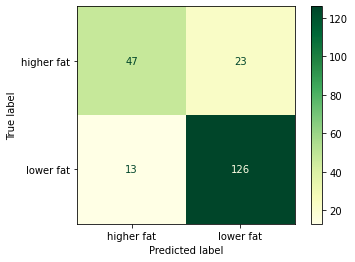

In [483]:
fatlevel_cm = plot_confusion_matrix(random_search_svc, 
                                   X_test, 
                                   le.transform(np.ravel(y_test)),
                                  display_labels = ['higher fat', 'lower fat'],
                                   cmap = 'YlGn')

The confusion matrix shows there a total of 70 higher fat cheeses out of which 23 were predicted wrong, and also out of 139 lower fat cheeses, 13 were predicted wrong. We can find out the corresponding scores by printing a classification report. 

In [484]:
print(classification_report(le.transform(np.ravel(y_test)), random_search_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        70
           1       0.85      0.91      0.88       139

    accuracy                           0.83       209
   macro avg       0.81      0.79      0.80       209
weighted avg       0.82      0.83      0.82       209



Looking at the confusion matrix and the classification report it is clear that the model does not do well for the higher fat cheeses. The precision is 0.78 and recall is 0.67, which shows that the true negative values returned are less, even though they were precise to an extend, which is clear from the confusion matrix as well. <br>
On the contarary, The model returns precise results in enough numbers for lower fat level class as seen in the classification report. 

In [485]:
results_df = pd.DataFrame({'CheeseName': test_df['CheeseName'],
                         'FatLevel' : test_df['FatLevel'],
                         'Predicted_FatLevel' : le.inverse_transform(best_model_svc.predict(X_test)),
                         'higher_fat_prob' : best_model_svc.predict_proba(X_test)[:,0],
                         'lower_fat_prob' : best_model_svc.predict_proba(X_test)[:,1]})
results_df.head()

,CheeseName,FatLevel,Predicted_FatLevel,higher_fat_prob,lower_fat_prob
55,Cheddar (Bothwell),higher fat,higher fat,0.852753,0.147247
137,Cheddar (Mornington Dairy),higher fat,higher fat,0.792671,0.207329
1001,Cogruet,lower fat,higher fat,0.585084,0.414916
794,Grain de Bayonne,higher fat,higher fat,0.964260,0.035740
107,Sao Miguel,lower fat,lower fat,0.500000,0.500000


The above dataframe gives the predict_proba for higher fat and lower fat, which would give us how confident the model is for each target class. The dataframe also gives the true label and predicted label by the model. There are many informations one can infer from this dataframe. 

In [486]:
dummy.fit(X_train, y_train)
dummy_test_score = dummy.score(X_test, y_test)
dummy_test_score

0.6650717703349283

If we were to compare the scores, the test score obtained by the hyperparameter tuned SVC is better than the baseline dummy model

## Discussions

In this work, the given Cheese data set is trained to classify the cheeses based on the fat level in them. Since the given dataset had null values and most of the data were categorical, column transformations were applied to do the training. The data was trained on different models including the baseline model. From the models, based on the f1 score, 2 models were chosen and hyperparameter tuning for them were done. The Logistic Regression model gave the coefficient of how much each feature would be contributing to the final prediction. The SVC model, which gave the best validation score was chosen for testing. Testing and assessment of the model was done, and the model was also compared with dummy model, and it was established that the hyperparametertuned SVC model performed better. To assess the confidence level of the model a dataframe containing predict_proba scores was obtained. <br>

This model does not predict the negative label, i.e., the higher fat level well. This may be because there is a class imbalance, and the model is learning less from this class. So, learning how to balance it and implementing that model that reduces this issue would be an improvement<br>
Also, in the model each text feature is given separately to the preprocessor. Learning how to group them together like it was done for categorical features and instead of calling the countvectorizer object separately for each feature, it would be needed to be called once only. Also, while doing the hyperparameter tuning, there won’t be a need to iterate 3 times for max_features separately.<br>

The obtained model was able to predict the lower fat level cheeses to a good extend. By making the above improvements, I believe the model would return better scores

## References

Not all the work in this notebook is original. Parts that were borrowed from other resources are as follows:

### Resources Used

* [Cheese Introduction](https://en.wikipedia.org/wiki/Cheese)
* [Cheese Image](https://en.wikipedia.org/wiki/Cheese)
* [Data Source](https://mark-prod-mds.stat.ubc.ca/jupyter/user/646102/lab/workspaces/auto-u/tree/intro-ml-students/release/final_project/data/cheese_data.csv)
* [Course Materials](https://ml-learn.mds.ubc.ca/https://ml-learn.mds.ubc.ca/)
* [Introduction to Machine Learning Assignments](https://mark-prod-mds.stat.ubc.ca/jupyter/user/646102/lab?https://mark-prod-mds.stat.ubc.ca/jupyter/user/646102/lab?)
* [Google](https://www.google.com/search?q=cheese&source=lnms&tbm=isch&sa=X&ved=2ahUKEwimgv7j6LL2AhUpFzQIHdqnAYsQ_AUoAXoECAMQAw&biw=1280&bih=577&dpr=1.5) To read and understand more about cheeses.<br>